In [13]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
from j_workflow.data import get_fremont_data

In [3]:
data = get_fremont_data()

In [4]:
# pivot wider with rows as time of day and columns as date
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
# sample the first five rows and cols
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


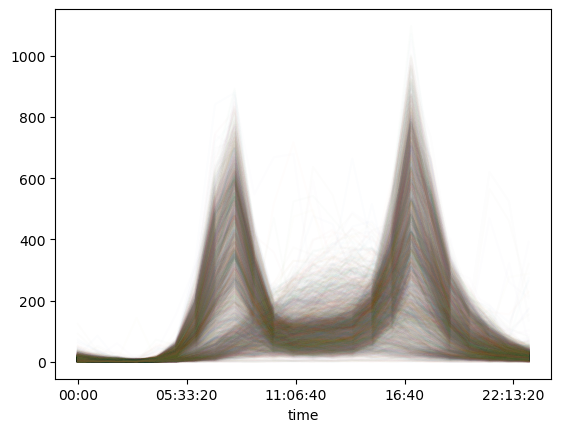

In [5]:
pivoted.plot(legend = False, alpha = 0.01);

In [5]:
data.index # something wrong with hours: AM PM wrong. coz we used %H instead of %I tim e format

DatetimeIndex(['2022-08-01 00:00:00', '2022-08-01 01:00:00',
               '2022-08-01 02:00:00', '2022-08-01 03:00:00',
               '2022-08-01 04:00:00', '2022-08-01 05:00:00',
               '2022-08-01 06:00:00', '2022-08-01 07:00:00',
               '2022-08-01 08:00:00', '2022-08-01 09:00:00',
               ...
               '2022-09-30 14:00:00', '2022-09-30 15:00:00',
               '2022-09-30 16:00:00', '2022-09-30 17:00:00',
               '2022-09-30 18:00:00', '2022-09-30 19:00:00',
               '2022-09-30 20:00:00', '2022-09-30 21:00:00',
               '2022-09-30 22:00:00', '2022-09-30 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=87600, freq=None)

In [7]:
len(np.unique(data.index.time))

24

In [ ]:
# update the unit test

In [7]:
pivoted.shape

(24, 3650)

In [8]:
pivoted.T.shape #transpose

(3650, 24)

In [9]:
# pivoted.T

In [14]:
X = pivoted.fillna(0).T.values

In [15]:

X2 = PCA(2, svd_solver='full').fit_transform(X)


In [ ]:
#https://www.youtube.com/watch?v=1kA7oD7ftsM&list=PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ&index=9

In [16]:
X2.shape

(3650, 2)

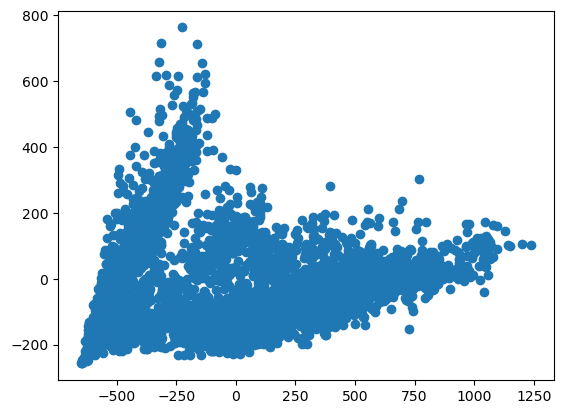

In [17]:

plt.scatter(X2[:,0], X2[:, 1])

In [18]:
# use a gaussian mixture model to identify the type of days
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)

In [19]:
labels

array([1, 1, 1, ..., 1, 1, 1])

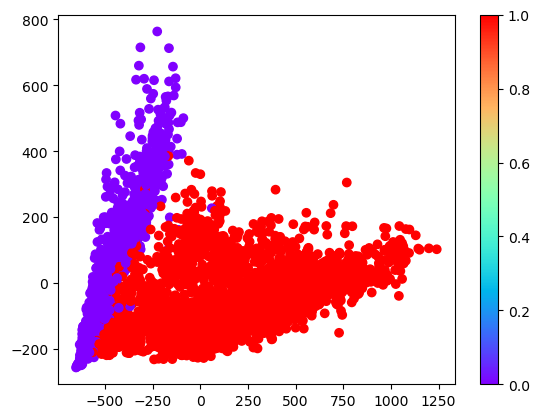

In [20]:
plt.scatter(X2[:,0], X2[:, 1], c= labels, cmap='rainbow')
plt.colorbar();

<AxesSubplot: xlabel='time'>

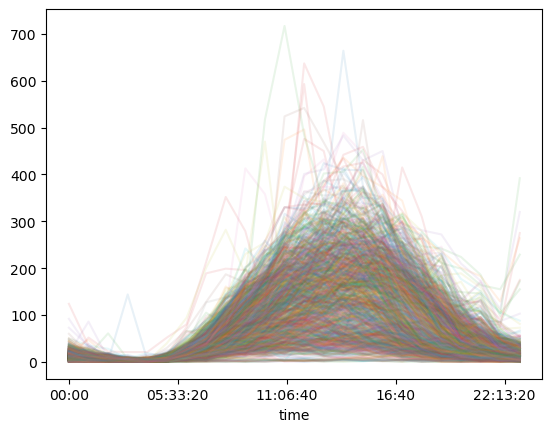

In [21]:
pivoted.T[labels == 0].T.plot(legend = False, alpha = 0.1)
# possibly weekends

In [ ]:
pivoted.T[labels == 1].T.plot(legend = False, alpha = 0.1)
# possibly weekdays commuting

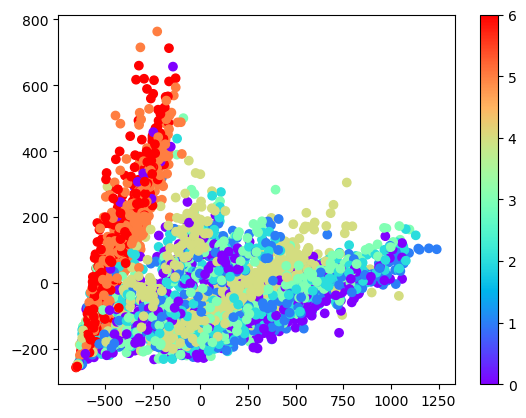

In [22]:
# lets see if the weekdays \ weekend hypothesis is true

dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

plt.scatter(X2[:,0], X2[:, 1], c= dayofweek, cmap='rainbow')
plt.colorbar();

In [24]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1 & (dayofweek < 5))] #holidays \ non working

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-06',
               '2012-10-07', '2012-10-08', '2012-10-09', '2012-10-10',
               '2012-10-11', '2012-10-12',
               ...
               '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24',
               '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30'],
              dtype='datetime64[ns]', length=3535, freq=None)

In [26]:
pd.DatetimeIndex(pivoted.columns)

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-06',
               '2012-10-07', '2012-10-08', '2012-10-09', '2012-10-10',
               '2012-10-11', '2012-10-12',
               ...
               '2022-09-21', '2022-09-22', '2022-09-23', '2022-09-24',
               '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30'],
              dtype='datetime64[ns]', length=3650, freq=None)